<a href="https://colab.research.google.com/github/abhisheksillur2003/My-Trading-Project/blob/main/My_Trading_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1614783770.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date_        1258 non-null   datetime64[ns]
 1   Close_AAPL   1258 non-null   float64       
 2   High_AAPL    1258 non-null   float64       
 3   Low_AAPL     1258 non-null   float64       
 4   Open_AAPL    1258 non-null   float64       
 5   Volume_AAPL  1258 non-null   int64         
 6   MA50_        1209 non-null   float64       
 7   MA200_       1059 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 78.8 KB
None
Index(['Date_', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL', 'MA50_', 'MA200_'],
      dtype='object')


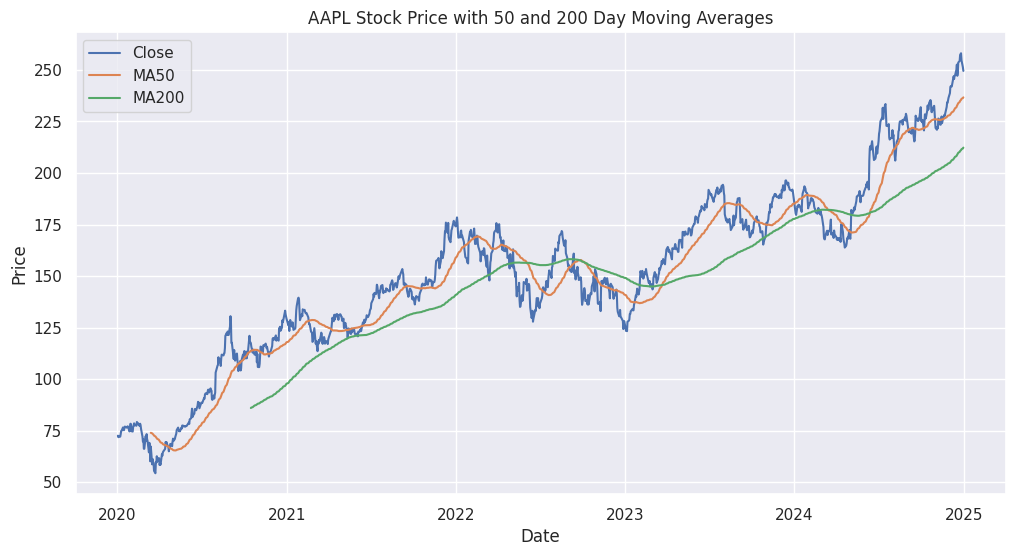

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download stock data
data = yf.download("AAPL", start="2020-01-01", end="2025-01-01")

# Add moving averages
data["MA50"] = data["Close"].rolling(50).mean()
data["MA200"] = data["Close"].rolling(200).mean()

# Reset index so "Date" is a column
data = data.reset_index()

# Flatten the MultiIndex columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Print info and columns to debug the structure
print(data.info())
print(data.columns)


# Set style
sns.set(style="darkgrid")

# Create a subset of data for plotting
plot_data = data[['Date_', 'Close_AAPL', 'MA50_', 'MA200_']]

# Plot using Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(x="Date_", y="Close_AAPL", data=plot_data, label="Close")
sns.lineplot(x="Date_", y="MA50_", data=plot_data, label="MA50")
sns.lineplot(x="Date_", y="MA200_", data=plot_data, label="MA200")
plt.title("AAPL Stock Price with 50 and 200 Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()